<a href="https://colab.research.google.com/github/JacquelineeJia/datathon2-Team2-CHL5230-F23/blob/main/datathon2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Run code on Colab
from google.colab import files
import pandas as pd
import io

uploaded = files.upload()
# Read the dataset into a Pandas DataFrame
df = pd.read_csv(io.BytesIO(uploaded['Cardiovascular Event Dataset.csv']))

In [ ]:
# Load dataset (other option)
from google.colab import drive
drive.mount('/content/drive')
uploaded = files.upload()

Mounted at /content/drive


In [ ]:
# Read the data
df = pd.read_csv('/content/drive/My Drive/CHL5230/Datathon #2/Cardiovascular Event Dataset.csv')

In [ ]:
#import libraries
import pandas as pd
import statsmodels.api as sm
import numpy as np
import io
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn import metrics


In [ ]:
# Load dataset
df = pd.read_csv('/content/Cardiovascular Event Dataset.csv')

FileNotFoundError: ignored



---
## Descriptive analysis of dataset


In [ ]:
# Preview the data
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
# Brief summary about each variable
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [ ]:
# Check if exists any missing values
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [ ]:
# Check how unknown BMI is encoded
df.loc[(df['gender']=='Male') & (df['bmi'].isnull())]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
13,8213,Male,78.0,0,1,Yes,Private,Urban,219.84,NaN,Unknown,1
19,25226,Male,57.0,0,1,No,Govt_job,Urban,217.08,NaN,Unknown,1
27,61843,Male,58.0,0,0,Yes,Private,Rural,189.84,NaN,Unknown,1
29,69160,Male,59.0,0,0,Yes,Private,Rural,211.78,NaN,formerly smoked,1
51,15102,Male,78.0,1,0,Yes,Private,Urban,75.32,NaN,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4949,2138,Male,58.0,0,0,Yes,Govt_job,Urban,84.94,NaN,never smoked,0
4984,1503,Male,31.0,0,0,No,Private,Urban,215.07,NaN,smokes,0
5039,42007,Male,41.0,0,0,No,Private,Rural,70.15,NaN,formerly smoked,0
5048,28788,Male,40.0,0,0,Yes,Private,Urban,191.15,NaN,smokes,0


In [ ]:
# Function to create bar plots for categorical variables
def create_barplot(dataset, cat_var):
  # create a new dataframe to store counts of observations in each group
  cat_counts = dataset.groupby(cat_var).size().reset_index(name='Count')

# plot data
  fig, ax = plt.subplots(figsize=(8, 5))
  sns.barplot(x=cat_counts[cat_var],
            y=cat_counts['Count'],
            ax=ax).set(title=f'Observation Count among {cat_var}')

# annotate
  ax.bar_label(ax.containers[0], label_type='edge')
  ax.tick_params(axis='x', rotation=45)

# pad the spacing between the number and the edge of the figure
  ax.margins(y=0.1)

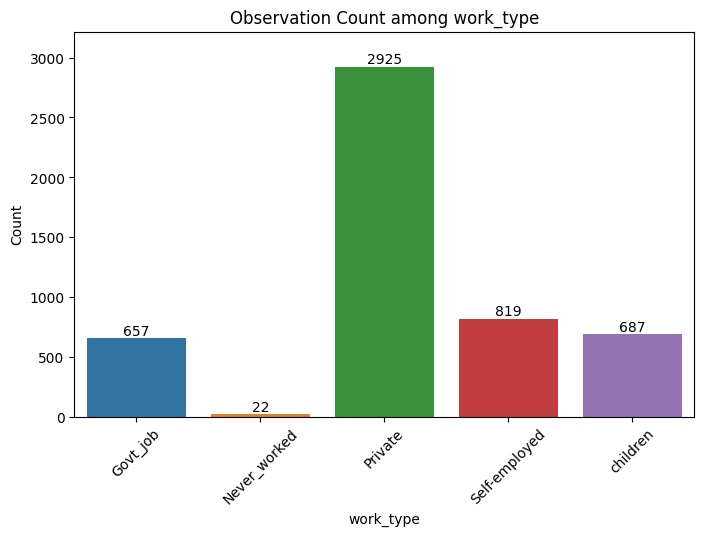

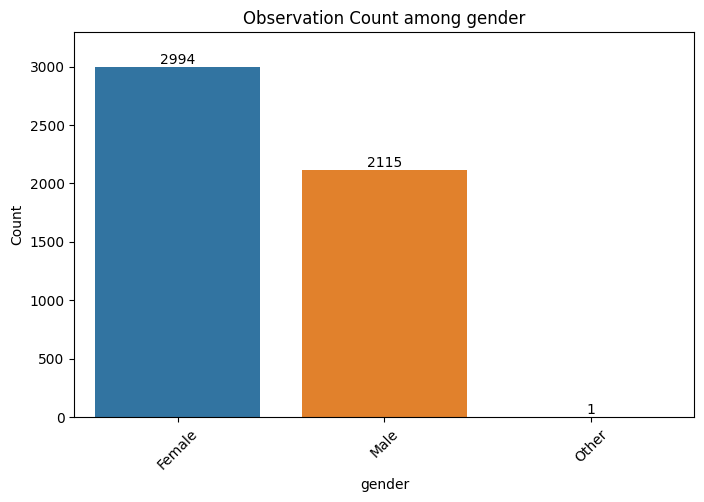

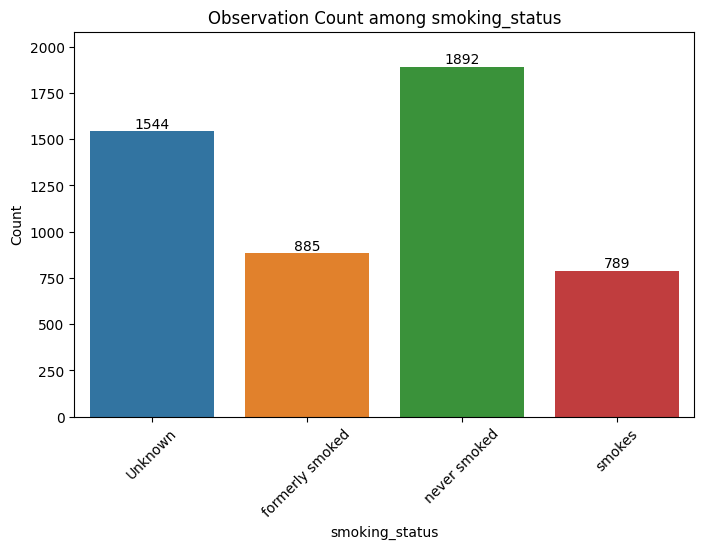

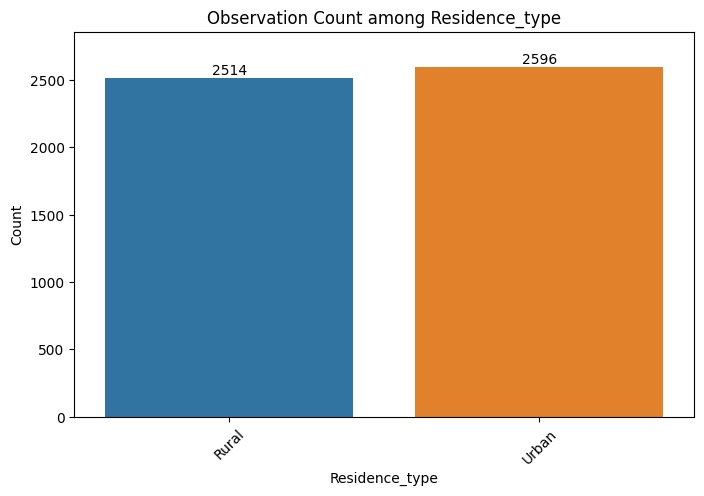

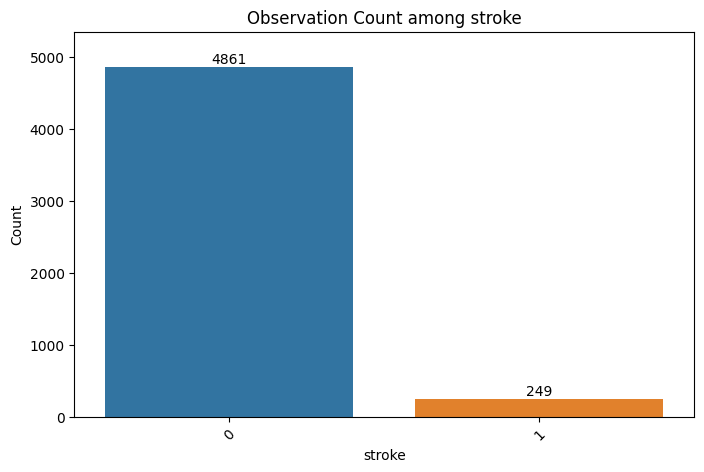

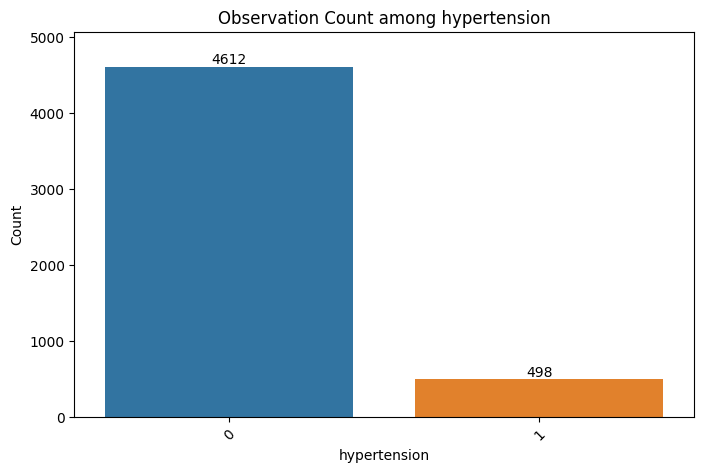

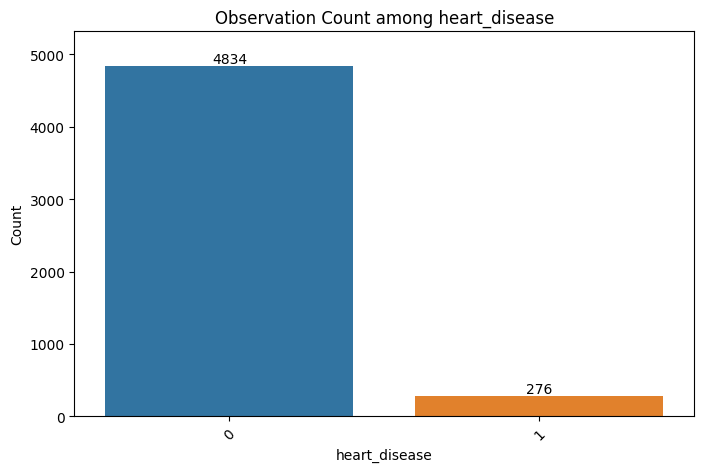

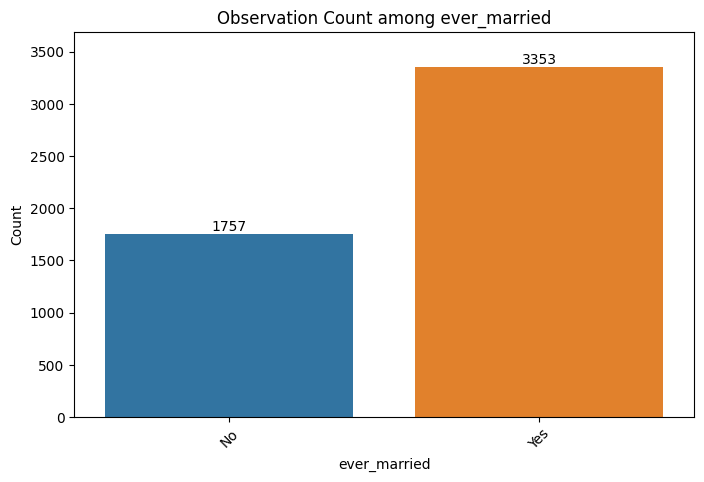

In [ ]:
# Bar plots for all categorical variables
create_barplot(df, 'work_type')
create_barplot(df, 'gender')
create_barplot(df, 'smoking_status')
create_barplot(df, 'Residence_type')
create_barplot(df, 'stroke')
create_barplot(df,'hypertension')
create_barplot(df, 'heart_disease')
create_barplot(df, 'ever_married')



---

# Data pre-processing

### 1) Remove ID from analysis

In [ ]:
# Drop ID
df = df.drop('id', axis =1)

### 2) Replace missing variables

In [ ]:
## BMI
# Replace BMI with median
df1 = df.dropna(subset=['bmi'])
med_bmi_gender = df1.groupby('gender')['bmi'].median()

def fill_bmi_na(r):
    if pd.isna(r['bmi']):
        return med_bmi_gender[r['gender']]
    return r['bmi']

df['bmi'] = df.apply(fill_bmi_na, axis = 1)


In [ ]:
# Check if replaced
df.loc[df['bmi'].isnull()]


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke


In [ ]:
## Gender
# There's only one ppl identified him/herself as 'Other'
df.loc[df['gender']=='Other'] # in our study, we limit the age to greater than 40 years of age, which would exclude id=56156 with gender as 'other'


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3116,Other,26.0,0,0,No,Private,Rural,143.33,22.4,formerly smoked,0


In [ ]:
## Smoking status
# Replace Unknown smoking status into NA
df['smoking_status'] = df['smoking_status'].replace('Unknown', np.nan)

# Check # of na
print(df['smoking_status'].isnull().sum())

# Identify smoking status (without NA)
smoke_status = df['smoking_status'].dropna().unique()
missing_indices = df[df['smoking_status'].isnull()].index

# Replace NA value with random sample
np.random.seed(999)
df.loc[missing_indices, 'smoking_status'] = np.random.choice(smoke_status, size=len(missing_indices))

# Check no more na value
print(df['smoking_status'].isnull().sum())

1544
0


array(['formerly smoked', 'never smoked', 'smokes'], dtype=object)

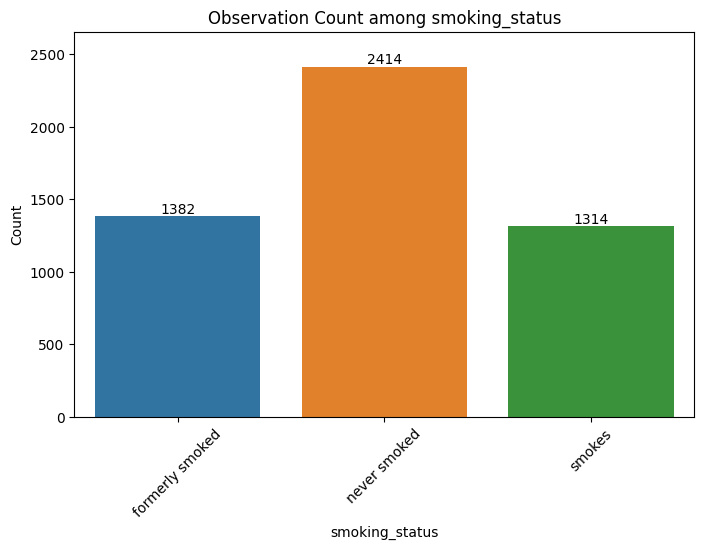

In [ ]:
# Check the new smoking status bar plots
create_barplot(df, 'smoking_status')
df['smoking_status'].dropna().unique()

In [ ]:
def create_density_plot(data, variable):

    plt.figure(figsize=(8, 6))

    # Plot the density plot
    sns.kdeplot(data[variable], shade=True, color='blue')

    # Set labels and title
    plt.xlabel(variable)
    plt.ylabel('Density')
    plt.title(f'Density Plot of {variable}')

    # Show the plot
    plt.show()

<ipython-input-23-82f61197a9e5>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[variable], shade=True, color='blue')


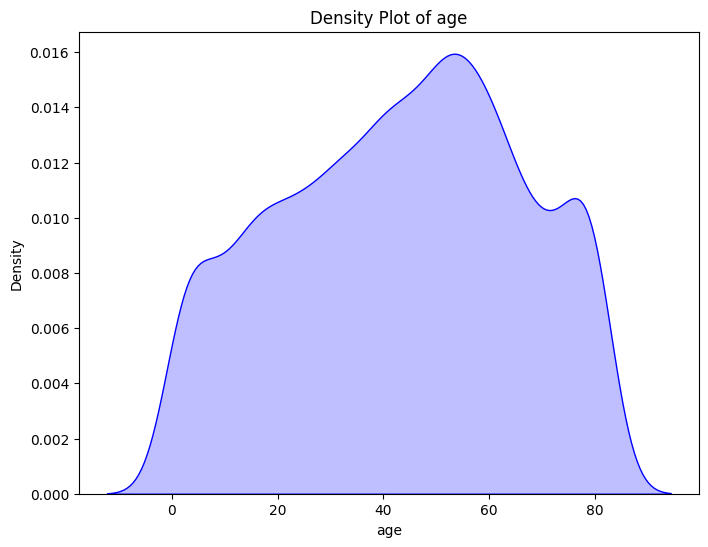

<ipython-input-23-82f61197a9e5>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[variable], shade=True, color='blue')


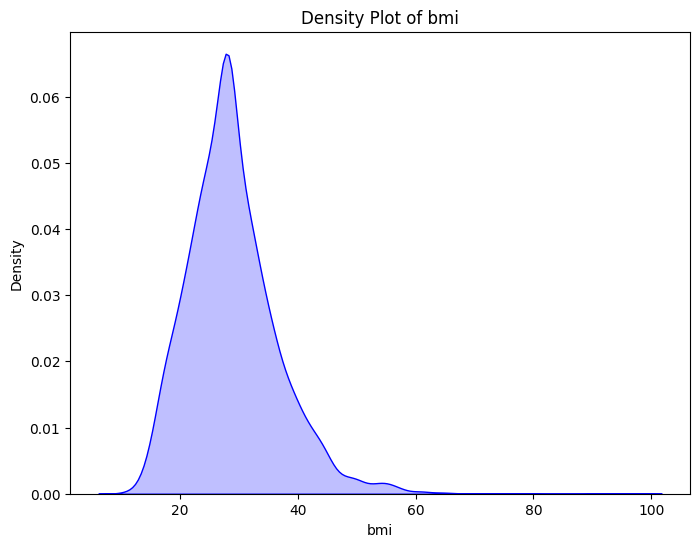

<ipython-input-23-82f61197a9e5>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[variable], shade=True, color='blue')


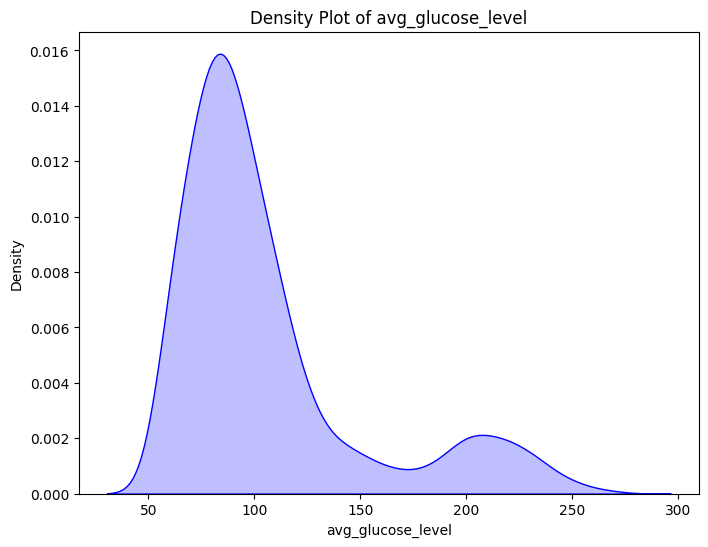

In [ ]:
#see the density plot for each numerical variables
create_density_plot(df, 'age')
create_density_plot(df, 'bmi')
create_density_plot(df, 'avg_glucose_level')

### 3) Add age limit >40 and combined outcome for heart disease and stroke

In [ ]:
# Create dataframe for individual age >40
df_40 = df.loc[(df['age']>40)]
df_40.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,27.8,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
# Descriptive analysis of demographics in analytic dataset
df_40.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,2866.000000,2866.000000,2866.000000,2866.000000,2866.00000,2866.000000
mean,60.176204,0.159107,0.095255,114.355911,30.73074,0.084089
std,12.050852,0.365839,0.293618,52.472671,6.79911,0.277570
min,41.000000,0.000000,0.000000,55.220000,11.30000,0.000000
25%,50.000000,0.000000,0.000000,78.657500,26.50000,0.000000
50%,59.000000,0.000000,0.000000,94.765000,29.40000,0.000000
75%,70.000000,0.000000,0.000000,127.270000,34.10000,0.000000
max,82.000000,1.000000,1.000000,271.740000,71.90000,1.000000


In [ ]:
# Descriptive analysis of demographics in analytic dataset - gender
df_40.gender.value_counts()

Female    1675
Male      1191
Name: gender, dtype: int64

In [ ]:
# Proportion of female
1675/2866

0.5844382414515004

In [ ]:
# Add a new column named cvd which see if individual experience one of the following outcomes: heart disease or stroke
df_40.loc[(df_40['heart_disease'] == 1) | (df_40['stroke'] == 1), 'cvd_heart_stroke'] = 1
df_40.loc[(df_40['heart_disease'] == 0) & (df_40['stroke'] == 0), 'cvd_heart_stroke'] = 0

<ipython-input-30-213ad279af3b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_40.loc[(df_40['heart_disease'] == 1) | (df_40['stroke'] == 1), 'cvd_heart_stroke'] = 1


In [ ]:
# Check if the column is correctly added
df_40.loc[df_40['cvd_heart_stroke']==1]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,cvd_heart_stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,1.0
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,27.8,never smoked,1,1.0
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,1.0
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,1.0
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4855,Female,57.0,1,1,Yes,Private,Rural,231.72,45.7,formerly smoked,0,1.0
4869,Female,50.0,0,1,Yes,Private,Urban,193.80,26.4,never smoked,0,1.0
4921,Male,72.0,0,1,Yes,Private,Rural,238.27,28.4,smokes,0,1.0
4986,Male,58.0,0,1,Yes,Private,Rural,225.35,26.5,smokes,0,1.0


In [ ]:
# Counts of outcome results
df_40.cvd_heart_stroke.value_counts()

0.0    2399
1.0     467
Name: cvd_heart_stroke, dtype: int64

In [ ]:
# Proportion of having the outcome
467/(467+2399)

0.16294487090020934

In [ ]:
# Check if the variables above have successfully transformed
df_40.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,cvd_heart_stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,1.0
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,27.8,never smoked,1,1.0
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,1.0
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,1.0
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,1.0


### 4) Dummy variables for categorical variables

In [ ]:
# Convert binary and categorical variables into dummy variables
df_40 = pd.get_dummies(data=df_40, columns=['smoking_status', 'work_type', 'gender', 'Residence_type', 'ever_married', 'hypertension'])

In [ ]:
# Check
df_40.head()

,age,heart_disease,avg_glucose_level,bmi,stroke,cvd_heart_stroke,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,work_type_Govt_job,work_type_Private,work_type_Self-employed,gender_Female,gender_Male,Residence_type_Rural,Residence_type_Urban,ever_married_No,ever_married_Yes,hypertension_0,hypertension_1
0,67.0,1,228.69,36.6,1,1.0,1,0,0,0,1,0,0,1,0,1,0,1,1,0
1,61.0,0,202.21,27.8,1,1.0,0,1,0,0,0,1,1,0,1,0,0,1,1,0
2,80.0,1,105.92,32.5,1,1.0,0,1,0,0,1,0,0,1,1,0,0,1,1,0
3,49.0,0,171.23,34.4,1,1.0,0,0,1,0,1,0,1,0,0,1,0,1,1,0
4,79.0,0,174.12,24.0,1,1.0,0,1,0,0,0,1,1,0,1,0,0,1,0,1


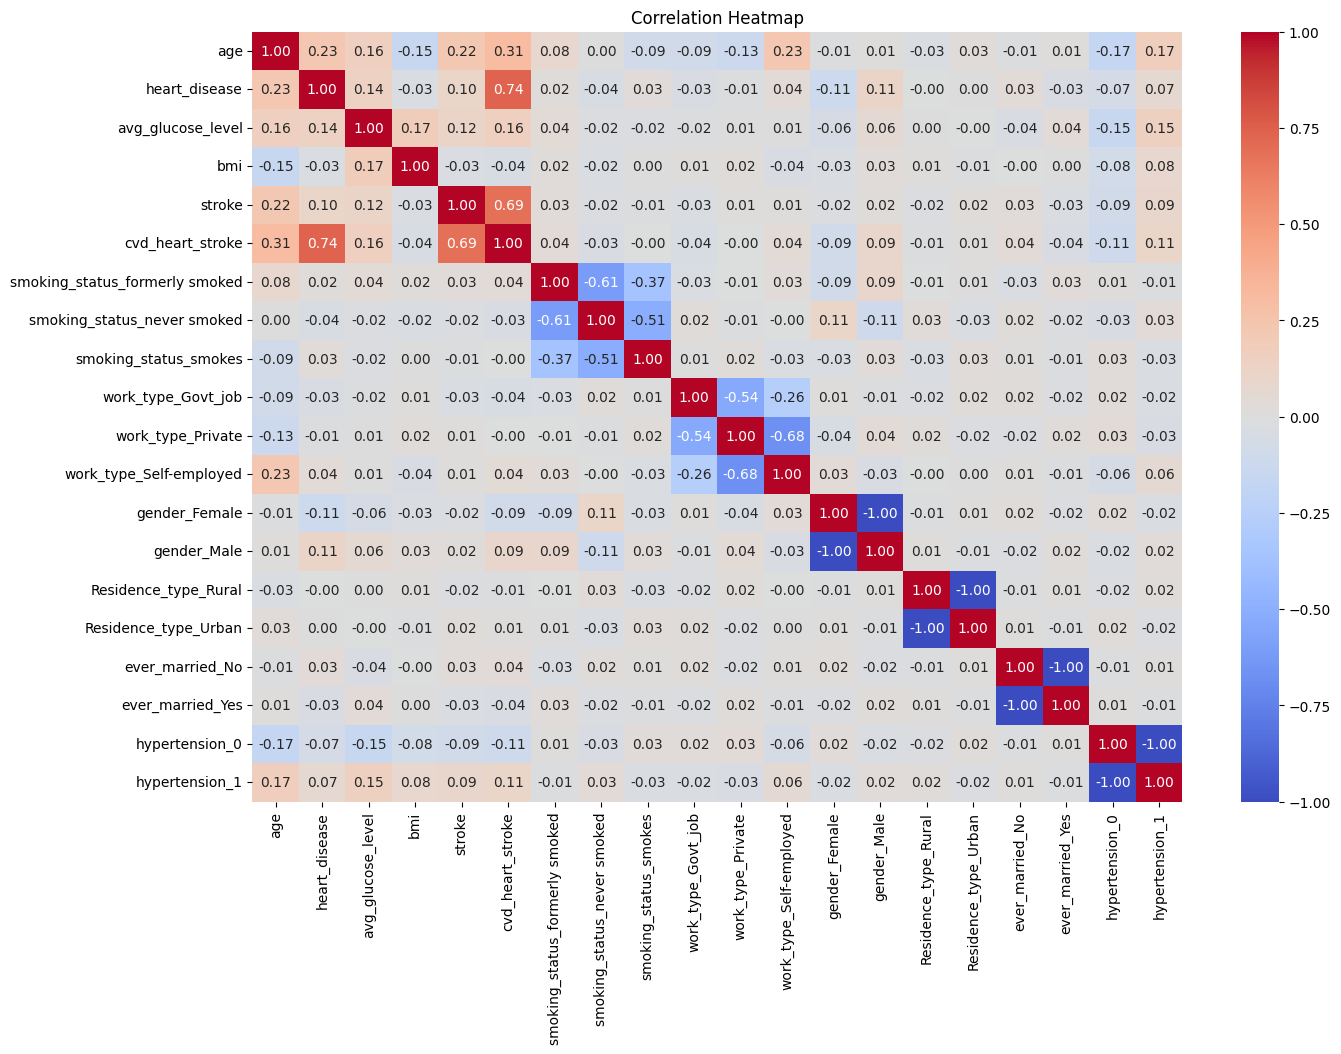

In [ ]:
# Check multicollinearity
correlation_matrix = df_40.corr()

plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid

IndexError: ignored

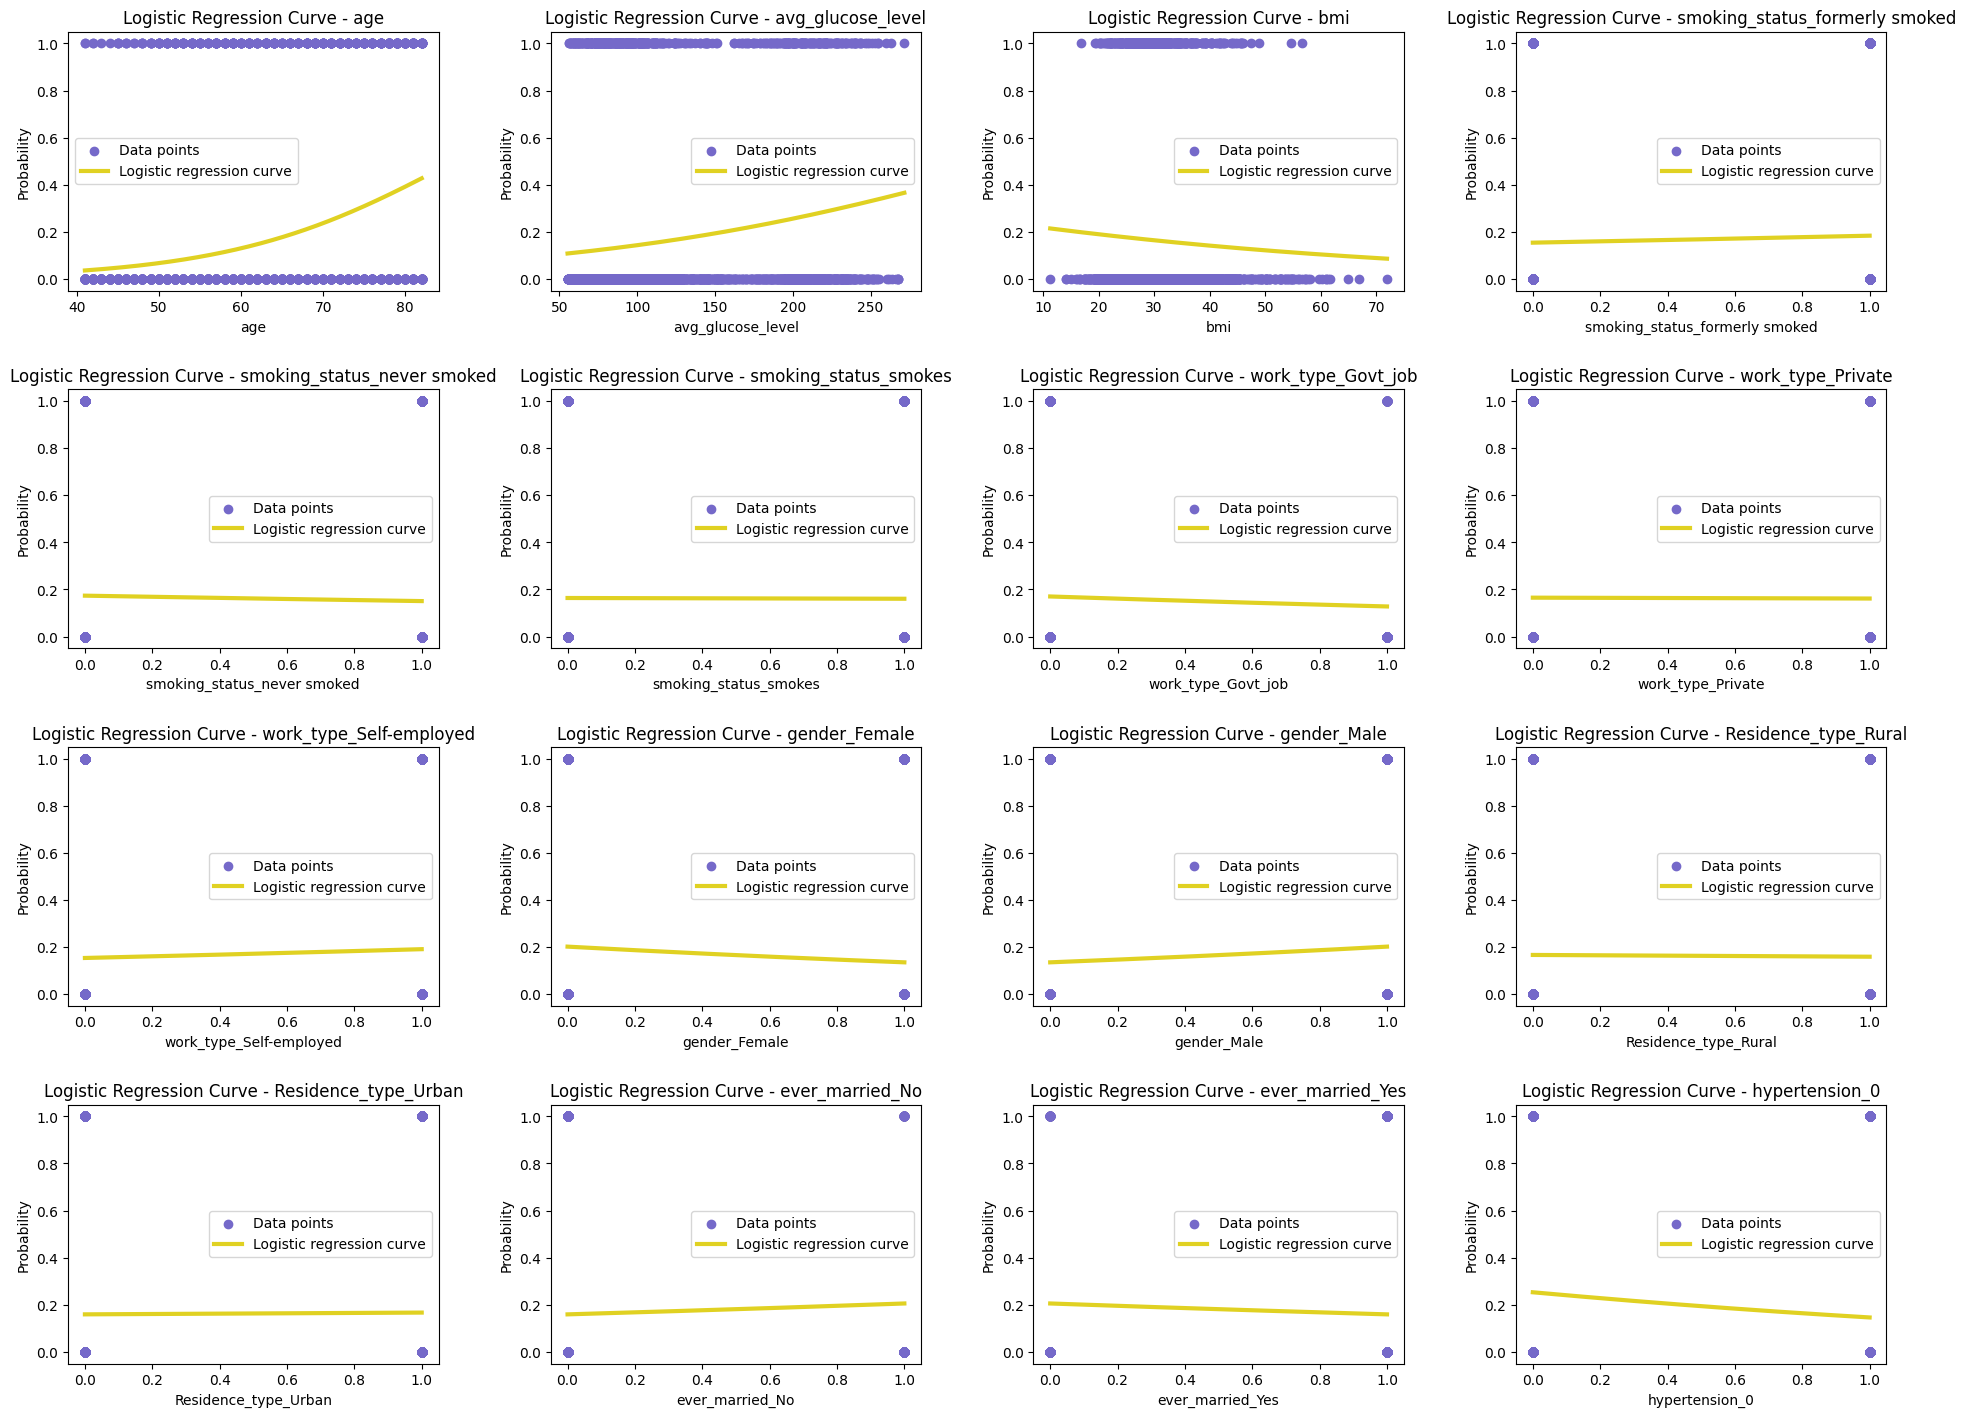

In [ ]:
## Test log regression for each variable individually
# Create logistic regression object
log_reg = LogisticRegression()
df_new = df_40.drop(['cvd_heart_stroke','heart_disease','stroke'], axis=1)

fig, axs = plt.subplots(4, 4, figsize=(20, 15))
fig.tight_layout(pad=5.0)  # Adds padding between subplots

for i, feature in enumerate(df_new.columns):  # Exclude 'Outcome' column
    row = i // 4  # Determine row index
    col = i % 4   # Determine column index

    # Reshape the feature and outcome arrays to fit the model
    X = df_40[[feature]]
    y = df_40['cvd_heart_stroke']

    # Fit logistic regression model
    log_reg.fit(X, y)

    # Get min and max values of the feature for plotting
    x_test = np.linspace(X.min(), X.max(), 300)

    # Get the probability for each value in the range
    prob = log_reg.predict_proba(x_test)[:, 1]

    # Plot the data points
    axs[row, col].scatter(X, y, color='#7569c9', label='Data points')

    # Plot the sigmoid curve
    axs[row, col].plot(x_test, prob, color='#e0d122', lw=3, label='Logistic regression curve' )

    axs[row, col].set_title(f'Logistic Regression Curve - {feature}')
    axs[row, col].set_xlabel(feature)
    axs[row, col].set_ylabel('Probability')
    axs[row, col].legend()

plt.show()



---

## Build logistic regression model

In [ ]:
# Split the data into features and target variable
X = df_40.drop([ 'cvd_heart_stroke', 'heart_disease','stroke'], axis=1)
y = df_40['cvd_heart_stroke']

# Normalizing data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Perform logistic regression with l1 penalty
log_reg = LogisticRegression(penalty='l1', C=1.0, solver='liblinear', class_weight = 'balanced')
log_reg.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', penalty='l1', solver='liblinear')

In [ ]:
# Use the model to make predictions on the testing data
y_pred = log_reg.predict(X_test)

# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Confusion Matrix:
[[324 158]
 [ 28  64]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.92      0.67      0.78       482
         1.0       0.29      0.70      0.41        92

    accuracy                           0.68       574
   macro avg       0.60      0.68      0.59       574
weighted avg       0.82      0.68      0.72       574



Text(0.5, 427.9555555555555, 'Predicted label')

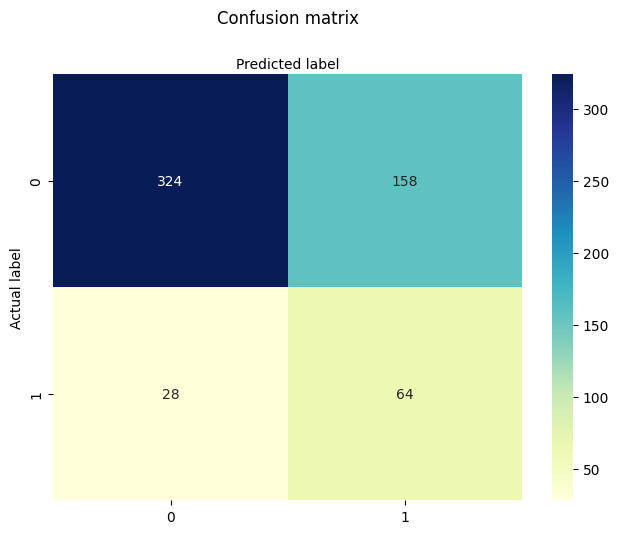

In [ ]:
# Confusion matrix

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmapm
sns.heatmap(pd.DataFrame(conf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


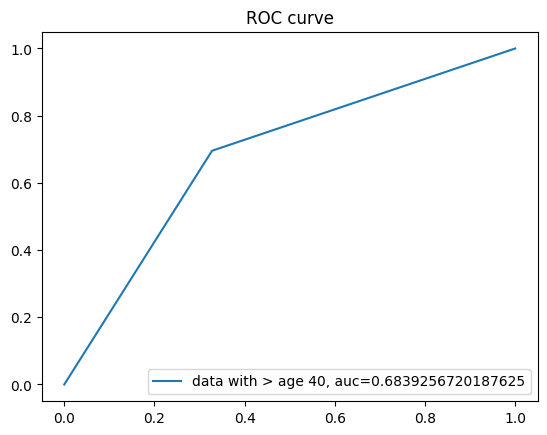

In [ ]:
# ROC curve
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred)
auc = metrics.roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="data with > age 40, auc="+str(auc))
plt.title("ROC curve")
plt.legend(loc=4)
plt.show()

In [ ]:
# Separate features and target variable
X = df_40.drop(['cvd_heart_stroke', 'stroke','heart_disease'], axis =1)

y = df_40['cvd_heart_stroke']

# Add a constant term for the intercept
X = sm.add_constant(X)

# Create and fit logistic regression model with l1 regularization
log_reg = sm.Logit(y, X).fit_regularized(method='l1')

# Get summary report
summary = log_reg.summary()
print(summary)

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.3836256089899834
            Iterations: 56
            Function evaluations: 65
            Gradient evaluations: 56
                           Logit Regression Results                           
Dep. Variable:       cvd_heart_stroke   No. Observations:                 2866
Model:                          Logit   Df Residuals:                     2848
Method:                           MLE   Df Model:                           17
Date:                Mon, 02 Oct 2023   Pseudo R-squ.:                  0.1370
Time:                        19:58:08   Log-Likelihood:                -1099.5
converged:                       True   LL-Null:                       -1274.0
Covariance Type:            nonrobust   LLR p-value:                 7.761e-64
                                     coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------

/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:2383: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:2441: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q * linpred)))
